In [1]:
import pandas as pd

df2020 = pd.read_excel (r'\\christie\dfsroot$\homedrives1\Sophie.Man\CancerWaitTime20-21.xlsx')
df2019 = pd.read_excel (r'\\christie\dfsroot$\homedrives1\Sophie.Man\CancerWaitTime19-20.xlsx')
data = pd.concat([df2019,df2020])
data.head()

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES
0,2019-04-01,2019-20,APR,2WW,NCN,NaN,Suspected skin cancer,1.0,1.0,0.0
1,2019-04-01,2019-20,APR,2WW,R1F,NaN,Suspected lower gastrointestinal cancer,1.0,1.0,0.0
2,2019-04-01,2019-20,APR,2WW,R1H,NaN,Suspected brain/central nervous system tumours,7.0,7.0,0.0
3,2019-04-01,2019-20,APR,2WW,R1H,NaN,Suspected breast cancer,645.0,642.0,3.0
4,2019-04-01,2019-20,APR,2WW,R1H,NaN,Suspected children's cancer,20.0,20.0,0.0


In [2]:
data.tail()

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES
72004,2021-03-01,2020-21,MAR,62 Days (Screening),RXW,Non-admitted,ALL CANCERS,2.0,2.0,0.0
72005,2021-03-01,2020-21,MAR,62 Days (Screening),RYJ,Admitted,ALL CANCERS,15.5,11.0,4.5
72006,2021-03-01,2020-21,MAR,62 Days (Screening),RYJ,Non-admitted,ALL CANCERS,1.5,1.0,0.5
72007,2021-03-01,2020-21,MAR,62 Days (Screening),RYR,Admitted,ALL CANCERS,28.0,15.5,12.5
72008,2021-03-01,2020-21,MAR,62 Days (Screening),RYR,Non-admitted,ALL CANCERS,2.0,1.0,1.0


Need to convert the 'PERIOD' column from string to integer

In [3]:
data['TOTAL TREATED'] = data['TOTAL TREATED'].astype(int)
data['WITHIN STANDARD'] = data['WITHIN STANDARD'].astype(int)
data['BREACHES'] = data['BREACHES'].astype(int)
data.dtypes

PERIOD             datetime64[ns]
YEAR                       object
MONTH                      object
STANDARD                   object
ORG CODE                   object
CARE SETTING               object
CANCER TYPE                object
TOTAL TREATED               int32
WITHIN STANDARD             int32
BREACHES                    int32
dtype: object

Clean up data

In [4]:
data.isnull()

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES
0,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
72004,False,False,False,False,False,False,False,False,False,False
72005,False,False,False,False,False,False,False,False,False,False
72006,False,False,False,False,False,False,False,False,False,False
72007,False,False,False,False,False,False,False,False,False,False


2WW is 2 week wait from referral from (usually) GP to be seen by a specialist. Therefore care setting is unknown/not applicable.

In [5]:
data['CARE SETTING'] = data['CARE SETTING'].fillna('Unknown')
data.head()

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES
0,2019-04-01,2019-20,APR,2WW,NCN,Unknown,Suspected skin cancer,1,1,0
1,2019-04-01,2019-20,APR,2WW,R1F,Unknown,Suspected lower gastrointestinal cancer,1,1,0
2,2019-04-01,2019-20,APR,2WW,R1H,Unknown,Suspected brain/central nervous system tumours,7,7,0
3,2019-04-01,2019-20,APR,2WW,R1H,Unknown,Suspected breast cancer,645,642,3
4,2019-04-01,2019-20,APR,2WW,R1H,Unknown,Suspected children's cancer,20,20,0


Percentage of 'Breaches' to total amount of cases treated will be important for comparison.

In [6]:
data['BREACH PROP'] = (data['BREACHES'] / data['TOTAL TREATED']) * 100
data.tail()

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,BREACH PROP
72004,2021-03-01,2020-21,MAR,62 Days (Screening),RXW,Non-admitted,ALL CANCERS,2,2,0,0.000000
72005,2021-03-01,2020-21,MAR,62 Days (Screening),RYJ,Admitted,ALL CANCERS,15,11,4,26.666667
72006,2021-03-01,2020-21,MAR,62 Days (Screening),RYJ,Non-admitted,ALL CANCERS,1,1,0,0.000000
72007,2021-03-01,2020-21,MAR,62 Days (Screening),RYR,Admitted,ALL CANCERS,28,15,12,42.857143
72008,2021-03-01,2020-21,MAR,62 Days (Screening),RYR,Non-admitted,ALL CANCERS,2,1,1,50.000000


In [7]:
data['CANCER TYPE'].unique()

array(['Suspected skin cancer', 'Suspected lower gastrointestinal cancer',
       'Suspected brain/central nervous system tumours',
       'Suspected breast cancer', "Suspected children's cancer",
       'Suspected gynaecological cancer',
       'Suspected haematological malignancies (excluding acute leukaemia)',
       'Suspected head & neck cancer', 'Suspected lung cancer',
       'Suspected testicular cancer',
       'Suspected upper gastrointestinal cancer',
       'Suspected urological malignancies (excluding testicular)',
       'Suspected acute leukaemia', 'Suspected other cancer',
       'Suspected sarcoma',
       'Exhibited (non-cancer) breast symptoms - cancer not initially suspected',
       'ALL CANCERS', 'Urological', 'Breast', 'Lower Gastrointestinal',
       'Lung', 'Other', 'Skin', 'ANTI-CANCER DRUG REGIMEN',
       'RADIOTHERAPY', 'SURGERY', 'Urological (Excluding Testicular)'],
      dtype=object)

#'ALL CANCERS' is the total for each organisation at each time point, so we should only use this, or the individual cancer type seperately. They should not be used together. 

In [8]:
data['CANCER TYPE'].value_counts()

ALL CANCERS                                                                35238
Other                                                                      17578
Breast                                                                     13427
Lung                                                                       13151
Lower Gastrointestinal                                                     13150
Skin                                                                       12414
Urological                                                                  7836
ANTI-CANCER DRUG REGIMEN                                                    7788
Urological (Excluding Testicular)                                           7162
SURGERY                                                                     6699
Suspected breast cancer                                                     5336
Suspected skin cancer                                                       5116
Suspected head & neck cancer

In [9]:
data.groupby([data['CANCER TYPE']]).sum()

,TOTAL TREATED,WITHIN STANDARD,BREACHES,BREACH PROP
CANCER TYPE,,,,
ALL CANCERS,1018918,895892,120183,485503.332214
ANTI-CANCER DRUG REGIMEN,187718,185981,1737,7266.709098
Breast,136512,127085,9359,83668.698551
Exhibited (non-cancer) breast symptoms - cancer not initially suspected,305171,245597,59574,82425.536337
Lower Gastrointestinal,95180,79376,15577,259088.394608
Lung,84663,76113,8051,185004.951504
Other,230710,201439,28237,249879.306742
RADIOTHERAPY,189682,182980,6702,15717.824903
SURGERY,109749,98463,11286,48208.177788


Note 'ALL CANCERS' is for all confirmed cases, not suspected. We need to seperate these.

In [10]:
data1 = data[data['CANCER TYPE'].str.contains('ALL')==False]

In [11]:
data1['STANDARD'].unique()

array(['2WW', '2WW Breast', '31 Days', '31 Days Sub (Drugs)',
       '31 Days Sub (Radio)', '31 Days Sub (Surgery)', '62 Days'],
      dtype=object)

In [12]:
data1['STANDARD'].value_counts()

2WW                      51210
31 Days                  44808
62 Days                  39910
31 Days Sub (Drugs)       7788
31 Days Sub (Surgery)     6699
2WW Breast                4700
31 Days Sub (Radio)       4093
Name: STANDARD, dtype: int64

In [13]:
data1.groupby([data1['STANDARD']]).sum().reset_index()

,STANDARD,TOTAL TREATED,WITHIN STANDARD,BREACHES,BREACH PROP
0,2WW,4467488,4013254,454234,434435.691562
1,2WW Breast,305171,245597,59574,82425.536337
2,31 Days,592141,565625,26516,164747.621070
3,31 Days Sub (Drugs),187718,185981,1737,7266.709098
4,31 Days Sub (Radio),189682,182980,6702,15717.824903
5,31 Days Sub (Surgery),109749,98463,11286,48208.177788
6,62 Days,308878,234312,72125,956835.711452


2WW - An operational standard for patients to be seen within two weeks by a specialist following an urgent GP referral for when cancer is suspected. 
2WW Breast - two week wait for symptomatic breast patients for when cancer is not intially suspsected. Operational standard(OS) = 93%.
31 Days is 31 day wait for first treatment following decision to treat new primary cancer. OS = 96&
31 Days Sub is 31 day wait for subsequent treatment - Drug (OS = 98%), Radiotherapy (OS = 94%) or Surgery (OS = 94%)
62 Days is 62 day wait for first treatment following urgent GP referral for new primary cancer (OS = 85%)
ALL CANCERS included:
62 Days (Screening) is 62 day wait following referral from cancer screening service
62 Days (Consultant) and (Upgrade) mean 62 day wait following consultant decision to upgrade the case priority. They mean the same thing however are referred to as 'Upgrade' in 2020-2021 and 'Consultant' in 2019-2020
However we have removed these for now

Suspected cancer cases appear to make up the majority of the data so lets focus on this.
We'll first look at the distribution of cases and operation standards over the two year period (Apr 2019 - Apr 2021).

In [14]:
suspect = data[data['CANCER TYPE'].str.contains('Suspected')]
suspect.head()

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,BREACH PROP
0,2019-04-01,2019-20,APR,2WW,NCN,Unknown,Suspected skin cancer,1,1,0,0.000000
1,2019-04-01,2019-20,APR,2WW,R1F,Unknown,Suspected lower gastrointestinal cancer,1,1,0,0.000000
2,2019-04-01,2019-20,APR,2WW,R1H,Unknown,Suspected brain/central nervous system tumours,7,7,0,0.000000
3,2019-04-01,2019-20,APR,2WW,R1H,Unknown,Suspected breast cancer,645,642,3,0.465116
4,2019-04-01,2019-20,APR,2WW,R1H,Unknown,Suspected children's cancer,20,20,0,0.000000


In [15]:
suspect2019 = suspect[suspect['YEAR'].str.contains('2019-20')]
suspect2019.head()

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,BREACH PROP
0,2019-04-01,2019-20,APR,2WW,NCN,Unknown,Suspected skin cancer,1,1,0,0.000000
1,2019-04-01,2019-20,APR,2WW,R1F,Unknown,Suspected lower gastrointestinal cancer,1,1,0,0.000000
2,2019-04-01,2019-20,APR,2WW,R1H,Unknown,Suspected brain/central nervous system tumours,7,7,0,0.000000
3,2019-04-01,2019-20,APR,2WW,R1H,Unknown,Suspected breast cancer,645,642,3,0.465116
4,2019-04-01,2019-20,APR,2WW,R1H,Unknown,Suspected children's cancer,20,20,0,0.000000


In [16]:
print(suspect2019[['TOTAL TREATED', 'WITHIN STANDARD', 'BREACHES',]].sum())

TOTAL TREATED      2386815
WITHIN STANDARD    2168130
BREACHES            218685
dtype: int64


In [17]:
total_sum = suspect2019['TOTAL TREATED'].sum()
breaches_sum = suspect2019['BREACHES'].sum()
(breaches_sum / total_sum) * 100

9.162209890586409

Percentage of breaches for the year 2019-2020 is 9.2%. 90.8 of patients were seen within the 14 day referral period.

In [18]:
suspect2020 = suspect[suspect['YEAR'].str.contains('2020-21')]
suspect2020.head()

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,BREACH PROP
0,2020-04-01,2020-21,APR,2WW,AQK,Unknown,Suspected skin cancer,42,41,1,2.380952
1,2020-04-01,2020-21,APR,2WW,NCN,Unknown,Suspected skin cancer,108,87,21,19.444444
2,2020-04-01,2020-21,APR,2WW,NQT,Unknown,Suspected skin cancer,38,37,1,2.631579
3,2020-04-01,2020-21,APR,2WW,NV1,Unknown,Suspected lower gastrointestinal cancer,44,37,7,15.909091
4,2020-04-01,2020-21,APR,2WW,NV1,Unknown,Suspected upper gastrointestinal cancer,23,12,11,47.826087


In [19]:
print(suspect2020[['TOTAL TREATED','WITHIN STANDARD','BREACHES',]].sum())

TOTAL TREATED      2080673
WITHIN STANDARD    1845124
BREACHES            235549
dtype: int64


In [20]:
total_sum = suspect2020['TOTAL TREATED'].sum()
breaches_sum = suspect2020['BREACHES'].sum()
(breaches_sum / total_sum) * 100


11.320808219263672

Percentage of breaches for the year 2020-2021 is 11.3%. 88.7% of patients were seen within the 14 day referral period.
The 2020-2021 time period is worse for meeting the operational standard for treatment than the previous year (90.8% vs 88.7%)
Let's break this down month-by-month over the two years.

In [21]:
print(suspect.columns)

Index(['PERIOD', 'YEAR', 'MONTH', 'STANDARD', 'ORG CODE', 'CARE SETTING',
       'CANCER TYPE', 'TOTAL TREATED', 'WITHIN STANDARD', 'BREACHES',
       'BREACH PROP'],
      dtype='object')


In [22]:
time_line = suspect.drop(['YEAR', 'MONTH', 'STANDARD', 'ORG CODE', 'CARE SETTING',
       'CANCER TYPE', 'BREACH PROP'], axis = 1)
print(time_line)

          PERIOD  TOTAL TREATED  WITHIN STANDARD  BREACHES
0     2019-04-01              1                1         0
1     2019-04-01              1                1         0
2     2019-04-01              7                7         0
3     2019-04-01            645              642         3
4     2019-04-01             20               20         0
...          ...            ...              ...       ...
67437 2021-03-01             41               40         1
67438 2021-03-01            442              426        16
67439 2021-03-01              2                2         0
67440 2021-03-01            208              203         5
67441 2021-03-01            182              181         1

[51210 rows x 4 columns]


In [23]:
time_line1 = time_line.groupby([time_line['PERIOD']]).sum()
time_line1.head()

,TOTAL TREATED,WITHIN STANDARD,BREACHES
PERIOD,,,
2019-04-01,199217,178802,20415
2019-05-01,200796,182320,18476
2019-06-01,194047,174798,19249
2019-07-01,221805,201659,20146
2019-08-01,200317,179096,21221


<AxesSubplot:xlabel='PERIOD', ylabel='TOTAL TREATED'>

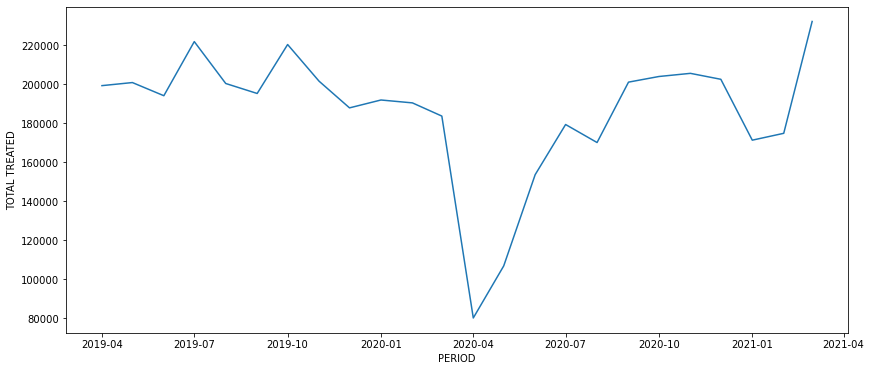

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(x='PERIOD', y='TOTAL TREATED', data=time_line1)

We can clearly see the extreme drop in total treated cases when COVID-19 first struck in Mar/Apr 2020, which coincided with many NHS services being halted or severely reduced. 
A quick recovery followed, with rates improving up to similar rates pre-COVID by Jul 2020. 
Rates generally pretty stable since. Decrease shown Late 2020 (Nov 2020 was when country went into 'lockdown' again).
Recovery April 2021 when services resumed to a normal level. Businesses and schools opened again.


Text(0, 0.5, 'No. of cases')

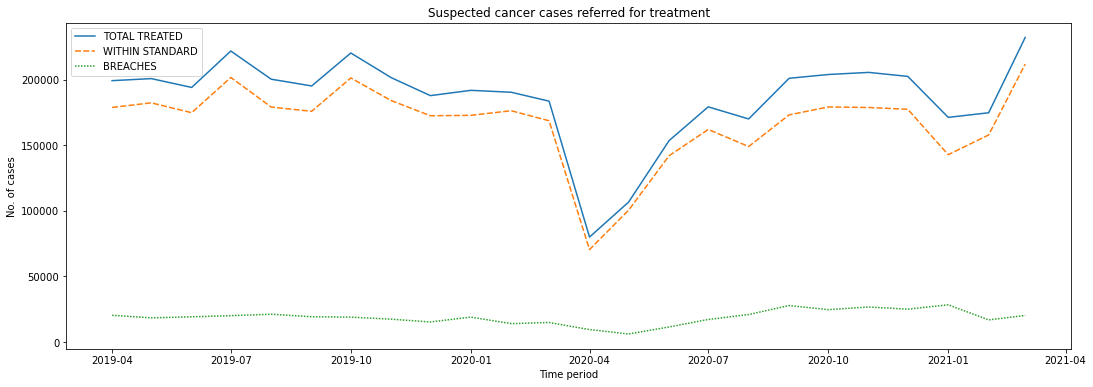

In [25]:
plt.figure(figsize=(18,6))
sns.lineplot(data=time_line1)
plt.title('Suspected cancer cases referred for treatment')
plt.xlabel('Time period')
plt.ylabel('No. of cases')

By plotting all three measures, we can see both total treated and within standard followed roughly the same trajectory, showing sharp decrease and increase at same time points.
Breaches maintained a fairly steady rate throughout despite a reduction or halt in services.
Let's look at this further to confirm.

In [26]:
time_line1['BREACH PROP'] = (time_line1['BREACHES'] / time_line1['TOTAL TREATED']) * 100
print(time_line1)

            TOTAL TREATED  WITHIN STANDARD  BREACHES  BREACH PROP
PERIOD                                                           
2019-04-01         199217           178802     20415    10.247619
2019-05-01         200796           182320     18476     9.201379
2019-06-01         194047           174798     19249     9.919762
2019-07-01         221805           201659     20146     9.082753
2019-08-01         200317           179096     21221    10.593709
2019-09-01         195196           175875     19321     9.898256
2019-10-01         220304           201292     19012     8.629893
2019-11-01         201498           184036     17462     8.666091
2019-12-01         187811           172476     15335     8.165123
2020-01-01         191852           172817     19035     9.921710
2020-02-01         190369           176304     14065     7.388283
2020-03-01         183603           168655     14948     8.141479
2020-04-01          80031            70494      9537    11.916632
2020-05-01

In [27]:
time_line1.loc[time_line1['BREACH PROP'].idxmax()]

TOTAL TREATED      171242.000000
WITHIN STANDARD    142810.000000
BREACHES            28432.000000
BREACH PROP            16.603403
Name: 2021-01-01 00:00:00, dtype: float64

In [28]:
time_line1.loc[time_line1['BREACH PROP'].idxmin()]

TOTAL TREATED      106741.000000
WITHIN STANDARD    100555.000000
BREACHES             6186.000000
BREACH PROP             5.795336
Name: 2020-05-01 00:00:00, dtype: float64

Percentage of breaches varies in the two year period from 5.8% to 16.6%. Let's plot this.

Text(0, 0.5, 'Percentage of cases')

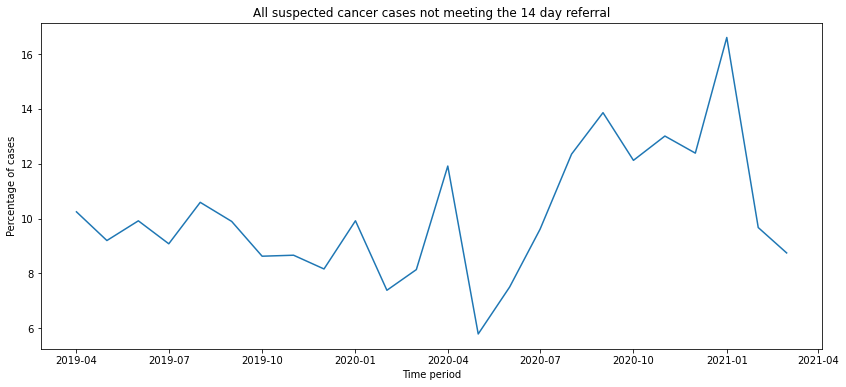

In [29]:
plt.figure(figsize=(14,6))
sns.lineplot(x='PERIOD', y='BREACH PROP', data=time_line1)
plt.title('All suspected cancer cases not meeting the 14 day referral')
plt.xlabel('Time period')
plt.ylabel('Percentage of cases')

There appears to be fairly significant fluctuation across timepoints.
Interestingly, the lowest percentage of breaches in a month was very soon after COVID struck, during lockdown no.1 (May 2020, 5.8%).
The highest percetage of breaches was Jan 2021, during lockdown no.2, with 16.6%. Meaning 83.4% of suspected cancer cases were 
seen within the 14 day standard. This falls also 10% short of the operational standard for the NHS which is 93%.
We can also see illustrated that the 2020-2021 period saw a decrease in the number of cases reaching the operational standard, as mentioned earlier.
(90.8% vs 88.7%)

Lets look at the seperate cases involving symptomatic patients where breast cancer was not initally suspected.

In [30]:
non_susp = data[data['CANCER TYPE'].str.contains('Exhibited')]
non_susp.head()

,PERIOD,YEAR,MONTH,STANDARD,ORG CODE,CARE SETTING,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,BREACH PROP
33322,2019-04-01,2019-20,APR,2WW Breast,R1F,Unknown,Exhibited (non-cancer) breast symptoms - cance...,1,1,0,0.000000
33323,2019-04-01,2019-20,APR,2WW Breast,R1H,Unknown,Exhibited (non-cancer) breast symptoms - cance...,244,244,0,0.000000
33324,2019-04-01,2019-20,APR,2WW Breast,R1K,Unknown,Exhibited (non-cancer) breast symptoms - cance...,259,199,60,23.166023
33325,2019-04-01,2019-20,APR,2WW Breast,RA2,Unknown,Exhibited (non-cancer) breast symptoms - cance...,1,1,0,0.000000
33326,2019-04-01,2019-20,APR,2WW Breast,RAL,Unknown,Exhibited (non-cancer) breast symptoms - cance...,179,156,23,12.849162


In [31]:
non_susp2019 = non_susp[non_susp['YEAR'].str.contains('2019-20')]
print(non_susp2019[['TOTAL TREATED', 'WITHIN STANDARD', 'BREACHES',]].sum())

TOTAL TREATED      176807
WITHIN STANDARD    148038
BREACHES            28769
dtype: int64


In [32]:
non_total = non_susp2019['TOTAL TREATED'].sum()
non_breach = non_susp2019['BREACHES'].sum()
(non_breach / non_total) * 100

16.27141459331361

In [33]:
non_susp2020 = non_susp[non_susp['YEAR'].str.contains('2020-21')]
print(non_susp2020[['TOTAL TREATED','WITHIN STANDARD','BREACHES',]].sum())

TOTAL TREATED      128364
WITHIN STANDARD     97559
BREACHES            30805
dtype: int64


In [34]:
non_total = non_susp2020['TOTAL TREATED'].sum()
non_breach = non_susp2020['BREACHES'].sum()
(non_breach / non_total) * 100

23.998161478296094

Significantly higher amount of breaches compared with the all suspected cancer cases.
16.3% in 2019-2020 and 24% in 2020-2021. The operational standard for these cases remains 93% so these fall short both years, at 83.7% and 76% respectively.
Let's plot this out to see if it follows a similar trajectory as all cancers.

In [35]:
nons_time = non_susp.drop(['YEAR', 'MONTH', 'STANDARD', 'ORG CODE', 'CARE SETTING',
       'CANCER TYPE', 'BREACH PROP'], axis = 1)
print(nons_time)

          PERIOD  TOTAL TREATED  WITHIN STANDARD  BREACHES
33322 2019-04-01              1                1         0
33323 2019-04-01            244              244         0
33324 2019-04-01            259              199        60
33325 2019-04-01              1                1         0
33326 2019-04-01            179              156        23
...          ...            ...              ...       ...
67553 2021-03-01             34               34         0
67554 2021-03-01            215              209         6
67555 2021-03-01            197               26       171
67556 2021-03-01            202              196         6
67557 2021-03-01            183              176         7

[4700 rows x 4 columns]


In [36]:
nons_time1 = nons_time.groupby([nons_time['PERIOD']]).sum()
nons_time1.head()

,TOTAL TREATED,WITHIN STANDARD,BREACHES
PERIOD,,,
2019-04-01,16753,12554,4199
2019-05-01,15949,12584,3365
2019-06-01,14885,11606,3279
2019-07-01,15824,13055,2769
2019-08-01,13220,11372,1848


<AxesSubplot:xlabel='PERIOD', ylabel='TOTAL TREATED'>

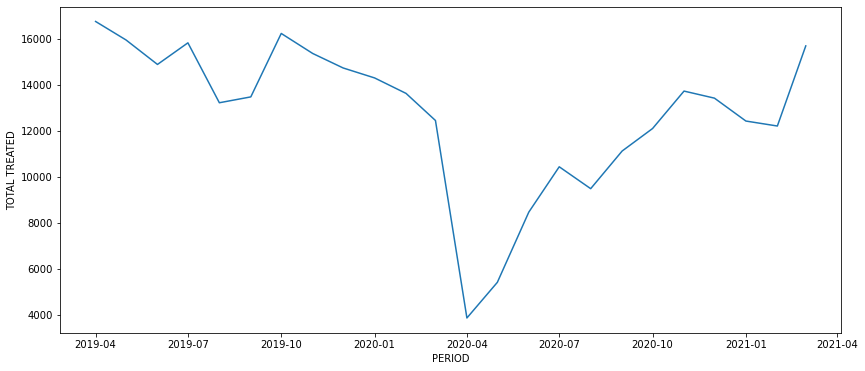

In [37]:
plt.figure(figsize=(14,6))
sns.lineplot(x='PERIOD', y='TOTAL TREATED', data=nons_time1)

Seems ollows similar tragectory as all suspected cases, however a slower recovery since COVID-19 compared with all other cases.

Text(0, 0.5, 'No. of cases')

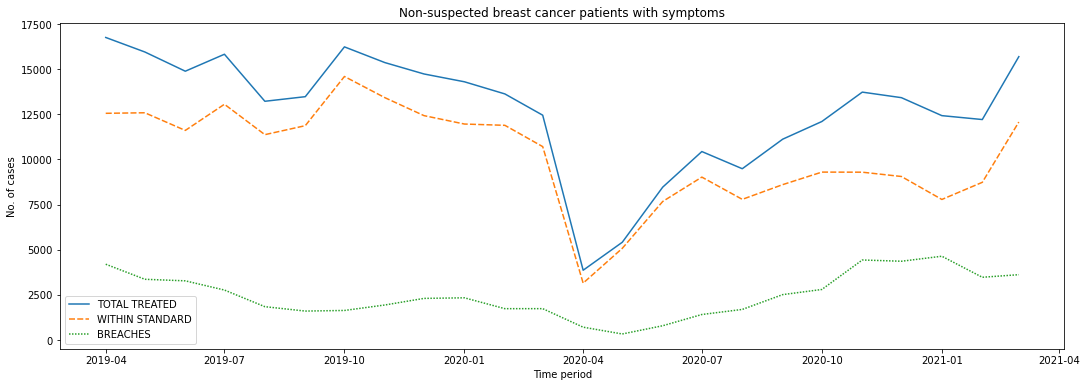

In [38]:
plt.figure(figsize=(18,6))
sns.lineplot(data=nons_time1)
plt.title('Non-suspected breast cancer patients with symptoms')
plt.xlabel('Time period')
plt.ylabel('No. of cases')

Lines generally appear to be closer together compared to all cases, suggesting a higher propotion of breaches to total cases.

In [39]:
nons_time1['BREACH PROP'] = (nons_time1['BREACHES'] / nons_time1['TOTAL TREATED']) * 100
print(nons_time1)

            TOTAL TREATED  WITHIN STANDARD  BREACHES  BREACH PROP
PERIOD                                                           
2019-04-01          16753            12554      4199    25.064168
2019-05-01          15949            12584      3365    21.098501
2019-06-01          14885            11606      3279    22.028888
2019-07-01          15824            13055      2769    17.498736
2019-08-01          13220            11372      1848    13.978820
2019-09-01          13475            11870      1605    11.910946
2019-10-01          16232            14593      1639    10.097339
2019-11-01          15362            13420      1942    12.641583
2019-12-01          14732            12425      2307    15.659788
2020-01-01          14299            11960      2339    16.357787
2020-02-01          13627            11889      1738    12.754091
2020-03-01          12449            10710      1739    13.968993
2020-04-01           3866             3153       713    18.442835
2020-05-01

In [40]:
nons_time1.loc[nons_time1['BREACH PROP'].idxmax()]

TOTAL TREATED      12425.000000
WITHIN STANDARD     7784.000000
BREACHES            4641.000000
BREACH PROP           37.352113
Name: 2021-01-01 00:00:00, dtype: float64

In [41]:
nons_time1.loc[nons_time1['BREACH PROP'].idxmin()]

TOTAL TREATED      5415.000000
WITHIN STANDARD    5078.000000
BREACHES            337.000000
BREACH PROP           6.223453
Name: 2020-05-01 00:00:00, dtype: float64

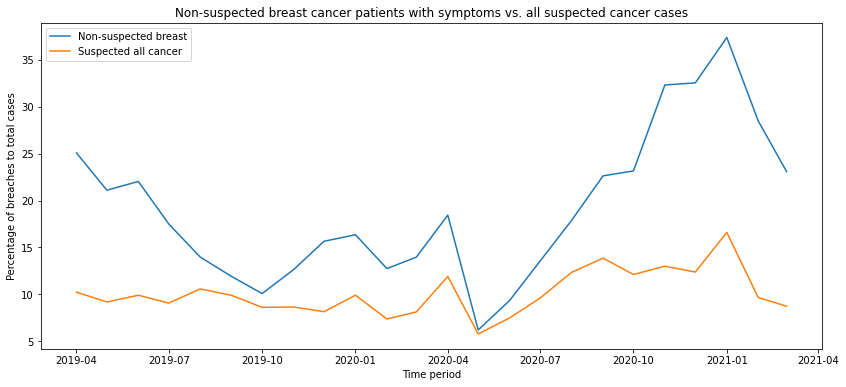

In [42]:
plt.figure(figsize=(14,6))
sns.lineplot(x='PERIOD', y='BREACH PROP', data=nons_time1, label='Non-suspected breast')
sns.lineplot(x='PERIOD', y='BREACH PROP', data=time_line1, label='Suspected all cancer')
plt.title('Non-suspected breast cancer patients with symptoms vs. all suspected cancer cases')
plt.xlabel('Time period')
plt.ylabel('Percentage of breaches to total cases')
plt.legend()

When comparing suspected (all cancer) and non-suspected breast cancer cases, both follow a similar trajectory, with breaches actually decreasing during the few months after the first lockdown, then increasing further into 2020 and 2021.
However, non-suspected breast cancer case breaches are at far greater scale and with an increase in the percentage of breaches shown after COVID-19. Maximum was 37.4% of cases that did not meet the operational standard benchmark of 93% in Jan 2021, in other words, only 62.6% of symptomatic breast cancer cases, that were intitally not suspected as cancer, met the 2 week operational standard.
There is a high level of variability, however operational standard was only met for one month (May 2020 93.8% of patients within 2WW). This includes time points before and after COVID-19.

Now lets compare by disease type for suspected cases

In [43]:
incidence = suspect.groupby('CANCER TYPE')['TOTAL TREATED'].sum().sort_values(ascending=False).reset_index()
incidence.head(15)

,CANCER TYPE,TOTAL TREATED
0,Suspected skin cancer,932440
1,Suspected breast cancer,860639
2,Suspected lower gastrointestinal cancer,820697
3,Suspected head & neck cancer,434131
4,Suspected gynaecological cancer,413370
5,Suspected urological malignancies (excluding t...,393579
6,Suspected upper gastrointestinal cancer,374395
7,Suspected lung cancer,108312
8,Suspected haematological malignancies (excludi...,41448
9,Suspected sarcoma,22898


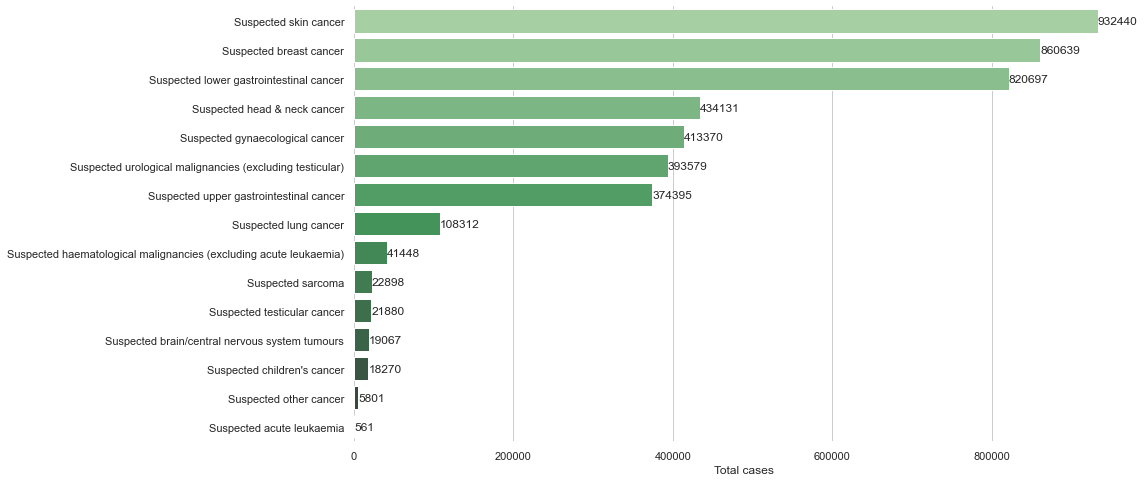

In [44]:
sns.set(style='whitegrid')
plt.subplots(figsize=(14,8))


inc = sns.barplot(x='TOTAL TREATED',y='CANCER TYPE', data=incidence, palette='Greens_d')
plt.xlabel('Total cases')
plt.ylabel('')
inc.bar_label(inc.containers[0])

sns.despine(left=True, bottom=True)

Rates of suspected cancers cases generally follow the national incidence rates e.g. breast, bowel, skin. Lung and urological (which included prostate) cancer looks to be suprisingly under-represented in this data when comparing to diagnosis data on the Office of National Statistics (https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/bulletins/cancerregistrationstatisticsengland/2017). Data is from 2017 however we can assume that genuine rates of new cases will not vary significantly year on year through the overservation of trends over the last few decades.
The discrepancy can either be explained by a genuine decrease in those having new cancer, however more likely to be explained by either a decrease in the amount of people going to their doctor with worries about symptoms due to COVID related difficulties e.g. fear of contracting it in public spaces (Dr's surgery), or perhaps due to the limited availability of GP appoitments have been since COVID (particularly face-to-face). This could also be reflected by a general slowing down of services, meaning more time to even have intially seen by the GP, to then having to wait longer for diagnosis and subsequent treatment (as we can see by the increase in breaches of target over this time period). This is worrying for the rates of missed cases or mis-diagnosis for people who do infact have cancer and may be reflected in the future by a significant rise in recorded suspected cases that could have repurcussions for limited capacity of health services.

In [45]:
target = suspect.groupby('CANCER TYPE').sum().sort_values(['WITHIN STANDARD'],ascending=False).reset_index()

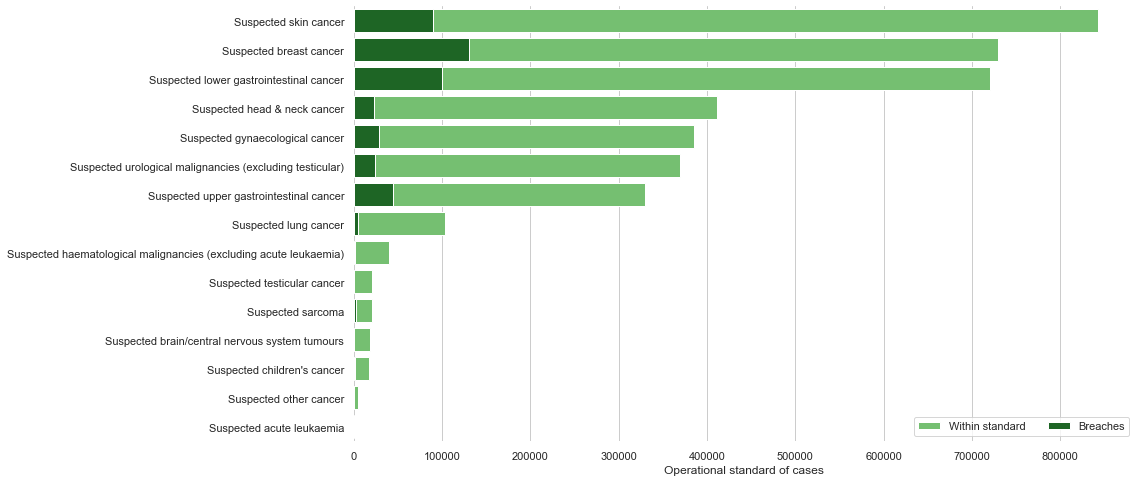

In [46]:
sns.set(style='whitegrid')
a,b = plt.subplots(figsize=(14,8))

sns.set_color_codes('muted')
sns.barplot(x='WITHIN STANDARD',y='CANCER TYPE', data=target, label='Within standard',color='g')
sns.set_color_codes('dark')
sns.barplot(x='BREACHES', y='CANCER TYPE', data=target, label='Breaches',color='g')

plt.xlabel('Operational standard of cases')
plt.ylabel('')
b.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

Looks like for certain cancers, there are a higher number of breaches in comparision to those within standard, particularly breast, upper and lower gastro. For the less common cancers it is hard to see from this graph any relevant data.

In [47]:
target.head(15)

,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,BREACH PROP
0,Suspected skin cancer,932440,842537,89903,50038.094640
1,Suspected breast cancer,860639,729507,131132,74753.664563
2,Suspected lower gastrointestinal cancer,820697,720766,99931,63646.764918
3,Suspected head & neck cancer,434131,410920,23211,29067.366922
4,Suspected gynaecological cancer,413370,384813,28557,30649.850321
5,Suspected urological malignancies (excluding t...,393579,369117,24462,28912.244595
6,Suspected upper gastrointestinal cancer,374395,330329,44066,49298.121466
7,Suspected lung cancer,108312,102888,5424,20984.413346
8,Suspected haematological malignancies (excludi...,41448,39579,1869,16585.857430
9,Suspected testicular cancer,21880,21113,767,9005.450218


We can view the data for rarer cancers now. Although this is hard to interpret just from the raw data. Better to look at percetage of breaches to total suspected cases to get a clearer representation.

In [48]:
area = target.drop(['BREACH PROP'], axis = 1)
area['BREACH PROP'] = (area['BREACHES'] / area['TOTAL TREATED']) * 100

In [49]:
type_per= area.sort_values(['BREACH PROP'],ascending=False)
type_per.head(15)

,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,BREACH PROP
1,Suspected breast cancer,860639,729507,131132,15.236586
2,Suspected lower gastrointestinal cancer,820697,720766,99931,12.176357
6,Suspected upper gastrointestinal cancer,374395,330329,44066,11.769922
0,Suspected skin cancer,932440,842537,89903,9.641693
10,Suspected sarcoma,22898,20708,2190,9.564154
13,Suspected other cancer,5801,5326,475,8.188243
12,Suspected children's cancer,18270,16935,1335,7.307061
4,Suspected gynaecological cancer,413370,384813,28557,6.908339
5,Suspected urological malignancies (excluding t...,393579,369117,24462,6.215271
3,Suspected head & neck cancer,434131,410920,23211,5.346543


Rank each type based on breach percentage and total treated to see if there is any correlation between how common the disease type is and how often target times are breached. Could be that the specialised services for more common cancers are the most over subscribed due to the sheer volume of patients needing a referral.

In [50]:
type_per['total_ranked'] = type_per['TOTAL TREATED'].rank(ascending=0)
type_per['breach_ranked'] = type_per['BREACH PROP'].rank(ascending=0)
type_per

,CANCER TYPE,TOTAL TREATED,WITHIN STANDARD,BREACHES,BREACH PROP,total_ranked,breach_ranked
1,Suspected breast cancer,860639,729507,131132,15.236586,2.0,1.0
2,Suspected lower gastrointestinal cancer,820697,720766,99931,12.176357,3.0,2.0
6,Suspected upper gastrointestinal cancer,374395,330329,44066,11.769922,7.0,3.0
0,Suspected skin cancer,932440,842537,89903,9.641693,1.0,4.0
10,Suspected sarcoma,22898,20708,2190,9.564154,10.0,5.0
13,Suspected other cancer,5801,5326,475,8.188243,14.0,6.0
12,Suspected children's cancer,18270,16935,1335,7.307061,13.0,7.0
4,Suspected gynaecological cancer,413370,384813,28557,6.908339,5.0,8.0
5,Suspected urological malignancies (excluding t...,393579,369117,24462,6.215271,6.0,9.0
3,Suspected head & neck cancer,434131,410920,23211,5.346543,4.0,10.0


From the additional rank columns, it looks as though there are so winners and losers, e.g. head and neck, haematolgoical malignancies ranked higher for the total cases, but lower for breach percentage. Conversely, other cancer, children's cancer and sarcoma ranked low for total cases, yet high for breach. We have to bear in mind these ranks do not take into account the numerical value of the data and how big the gap is between each of the values for each cancer type.

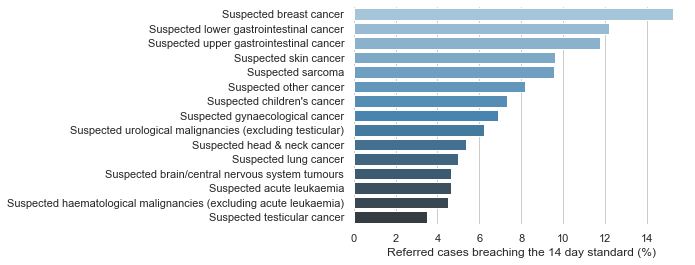

In [51]:
breach_type = sns.barplot(x='BREACH PROP',y='CANCER TYPE', data=type_per, palette='Blues_d')
plt.xlabel('Referred cases breaching the 14 day standard (%)')
plt.ylabel('')
inc.bar_label(inc.containers[0])

sns.despine(left=True, bottom=True)

Large variability in percentage of breaches for the different disease types. Why?
1. This could be correlational with the total amount of suspected cases i.e. the more patients wanting to access the services, the higher the percentage of breaches reflecting a system that cannot meet with the demand, however we can see from the ranking, this doesn't appear to be the case e.g. children's cancer is rare compared to others, however ranked 6 places higher for breach percentage. However, for diseases like breast cancer, its common and also high breaches. On the other hand, acute leukemia very rare, and also very few breaches - suggests seeing a specialist for this type of cancer is a lot easier.
2. There may be conicidentally fewer specialist teams for certain diseases. Perhaps more specialist centres for certain types of cancer. More available specialist clinicians.
3. Different approaches for disease teams. May be intrumental for some disease teams to follow more closely to the 2WW due to the severity and how that disease develops. May be more of the 'norm' to not follow the 2WW standard for disease types that are potentially spotted in the earlier stages. Alternatively it may be that the chances of surviving from these cancers if caught in the early stages is higher, therefore less percieved urgency from patients and healthcare professionals.
4. Large variability between different locations. Some Trusts may be consistently performing under what is expected, whilst others meeting target.

Text(0.5, 1.0, 'Total treated cases vs. percentage of breaches per disease type')

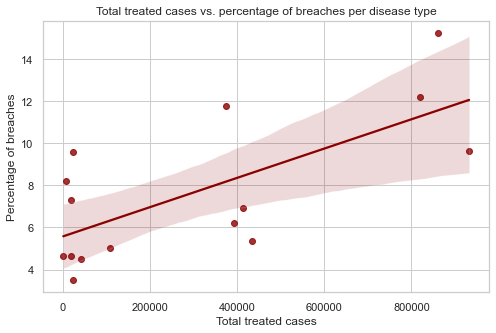

In [52]:
plt.figure(figsize=(8,5))
sns.regplot(x='TOTAL TREATED', y='BREACH PROP', data=type_per, color='darkred')

plt.xlabel('Total treated cases')
plt.ylabel('Percentage of breaches')
plt.title('Total treated cases vs. percentage of breaches per disease type')

Text(0.5, 1.0, 'Ranked: Total treated cases vs. percentage of breaches per disease type')

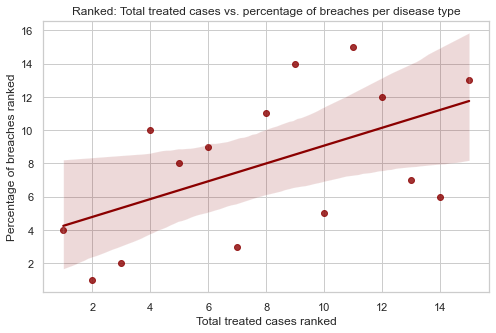

In [53]:
plt.figure(figsize=(8,5))
sns.regplot(x='total_ranked', y='breach_ranked', data=type_per, color='darkred')

plt.xlabel('Total treated cases ranked')
plt.ylabel('Percentage of breaches ranked')
plt.title('Ranked: Total treated cases vs. percentage of breaches per disease type')

In [54]:
from scipy.stats import kendalltau
corr, p = kendalltau(type_per['total_ranked'], type_per['breach_ranked'])
print('corr: %.3f' % corr)
alpha = 0.05
print('p=%.3f' % p)

corr: 0.390
p=0.046


There is a moderate correlation between total cases and breach percentage which may part explain the variability in breach percentage.
One suggestion to improve percentage of breaches is to invest more into those cancers that are more common e.g. breast cancer has the highest amount of breaches and also has the second highest total rate, so perhaps improving the current referral services will help this discrepancy. However being aware that not all disease types follow this trend. Further investigation into why certain cancers like children's cancer and sarcoma are rarer yet have a higher breach percentage is required as this may not be fully explained by the sheer volume of patients needing referral. You could look at how referrals for haematological maliganancies (for example, who have a very low breach rank compared to total rank) compare to one of these disease types to understand what exactly is going wrong.

Further anaylsis:
1. Certainly the performance between each Trust needs investigating by looking at the ORG CODE column. More data would be useful to understand which organisation maps on to each code and plotting this onto a map would be useful to see if there are certain areas of the country that are performing worse than others and what can be done about this. Also looking at the interaction between cancer type and location.
2. I have only touched upon the suspected cases. Further analysis would need to look at the 31 day and 62 day targets for the patient receiveing their first treatment, as well as the differentiation between the different treatment types, and also the different methods of referral, as this has the potential to show very different patterns.